In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

In [4]:
tf.random.set_seed(42)

In [5]:
hand = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [7]:
(X_train, y_train), (X_test, y_test) = hand

In [8]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

C:\Users\rubix\AppData\Local\Temp\ipykernel_32388\1539957955.py:2: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.arrayprint.
  np.core.arrayprint._line_width = 180000


In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

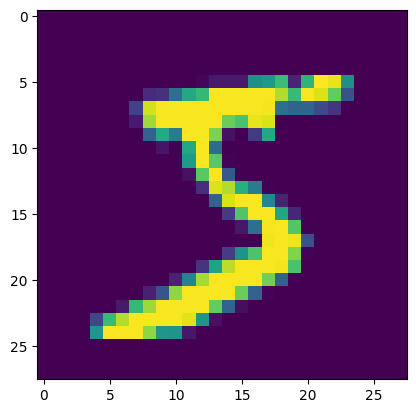

In [12]:
plt.imshow(X_train[0])

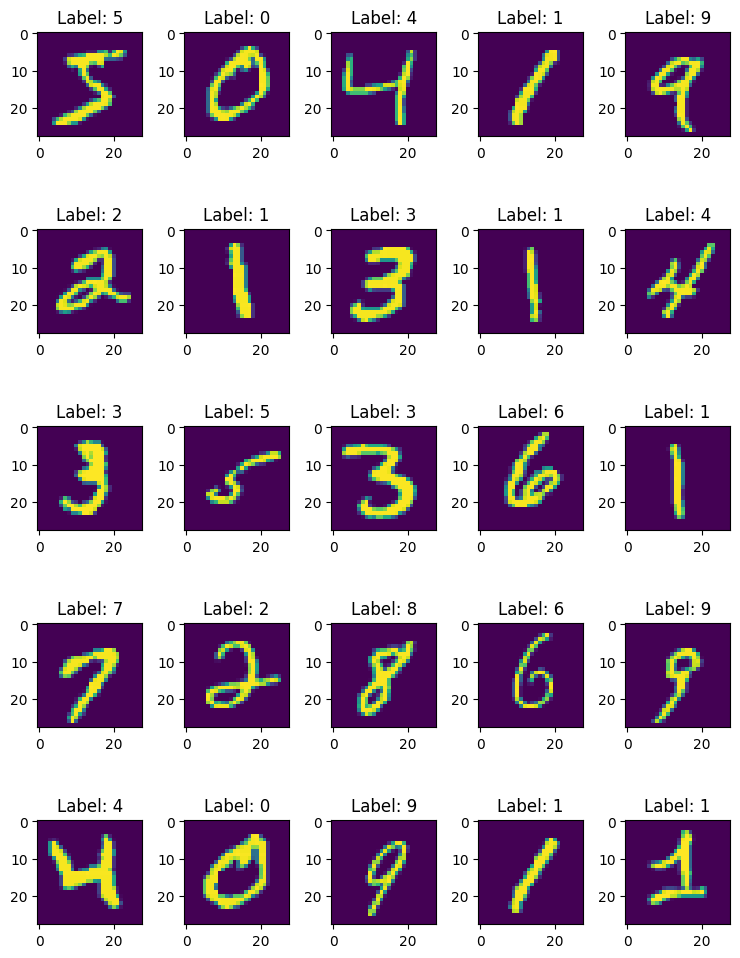

In [13]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [14]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [16]:
X_train /= 255
X_test /= 255

In [18]:
# 6. Preprocess class labels
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [19]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [20]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [21]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\rubix\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# 9. Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9359 - loss: 0.2108
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9746 - loss: 0.0863
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9799 - loss: 0.0667
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9828 - loss: 0.0548
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9855 - loss: 0.0477
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9868 - loss: 0.0431
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9879 - loss: 0.0383
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9887 - loss: 0.0349
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9898 - loss: 0.0325
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9909 - loss: 0.0286


In [23]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9912 - loss: 0.0334


In [24]:
#predict first 4 images in the test set
model.predict(X_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[1.1827041e-18, 7.5037069e-13, 1.1467831e-12, 1.6541400e-10,
        3.3158240e-14, 6.2012291e-18, 3.0808742e-23, 1.0000000e+00,
        5.7391670e-16, 6.5387610e-13],
       [8.6996023e-14, 1.6195438e-09, 1.0000000e+00, 1.1683745e-14,
        8.2899983e-18, 4.3705370e-19, 2.3375938e-13, 4.3209850e-12,
        4.6911808e-16, 1.2669699e-18],
       [7.7350133e-11, 9.9999774e-01, 1.4988517e-07, 2.1629175e-10,
        6.3170251e-07, 4.0575459e-09, 3.5840623e-07, 1.0195992e-06,
        3.2677708e-08, 7.0388650e-10],
       [9.9993968e-01, 5.9419947e-10, 9.3670782e-10, 2.2685315e-11,
        1.6940822e-10, 5.4346283e-09, 6.0288461e-05, 1.6022982e-10,
        8.7408445e-09, 4.4453192e-09]], dtype=float32)

In [25]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([1., 1., 1., 1.], dtype=float32)

In [26]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [27]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[ 974    0    2    0    0    0    2    1    1    0]
 [   0 1128    4    0    0    1    1    1    0    0]
 [   1    1 1026    0    0    0    0    4    0    0]
 [   0    0    1 1007    0    1    0    0    1    0]
 [   0    0    1    0  972    0    4    0    3    2]
 [   0    0    0    6    0  885    1    0    0    0]
 [   2    1    0    1    1    2  949    0    2    0]
 [   0    1    9    0    0    0    0 1016    2    0]
 [   1    0    2    1    0    0    0    1  968    1]
 [   1    0    0    4    3    6    0    3    5  987]]


In [29]:
path = r'C:\Users\rubix\Downloads\Machine Learning 2'
path

'C:\\Users\\rubix\\Downloads\\Machine Learning 2'

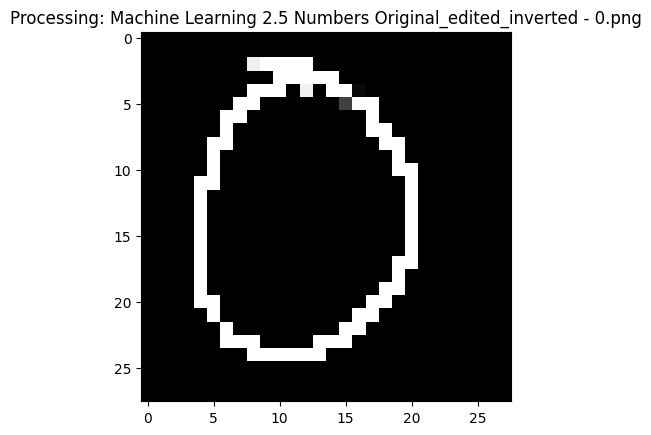

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Machine Learning 2.5 Numbers Original_edited_inverted - 0.png: Predicted as 0


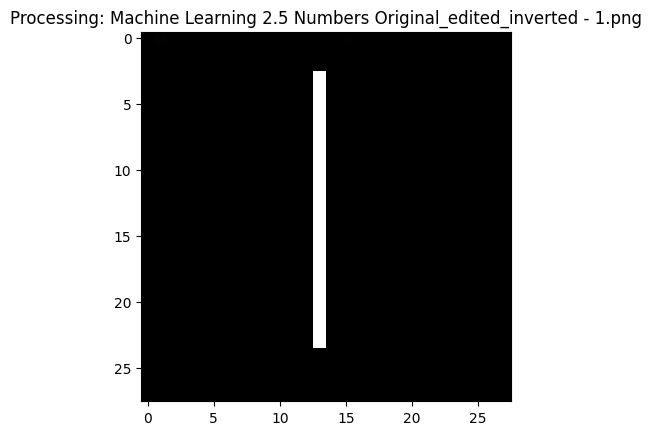

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Machine Learning 2.5 Numbers Original_edited_inverted - 1.png: Predicted as 1


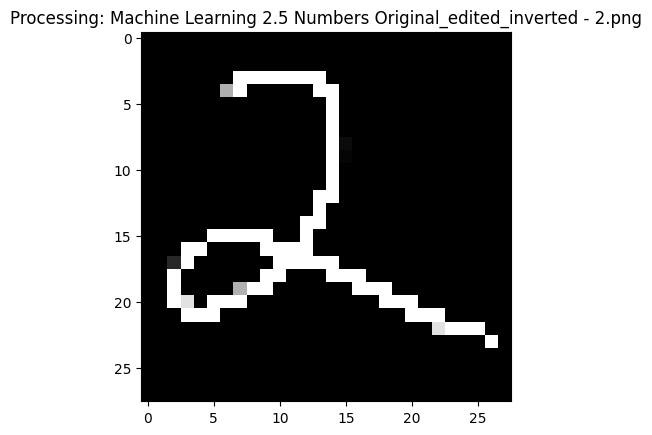

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Machine Learning 2.5 Numbers Original_edited_inverted - 2.png: Predicted as 2


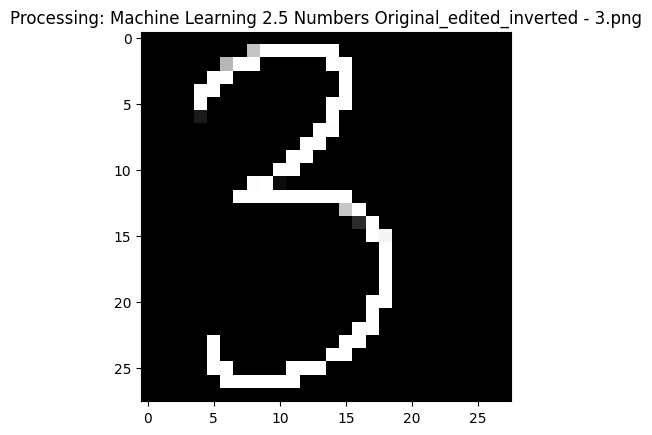

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Machine Learning 2.5 Numbers Original_edited_inverted - 3.png: Predicted as 3


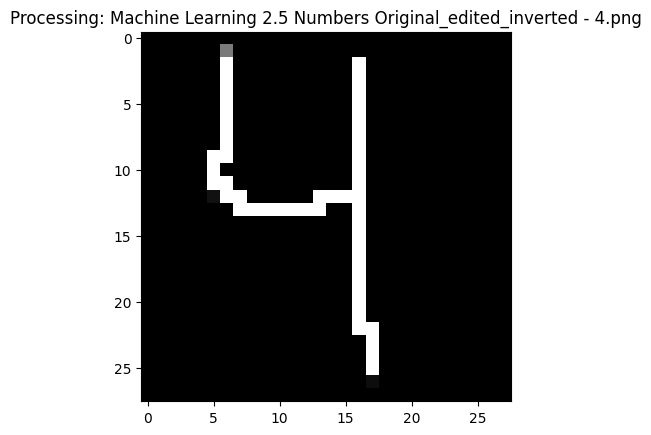

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Machine Learning 2.5 Numbers Original_edited_inverted - 4.png: Predicted as 4


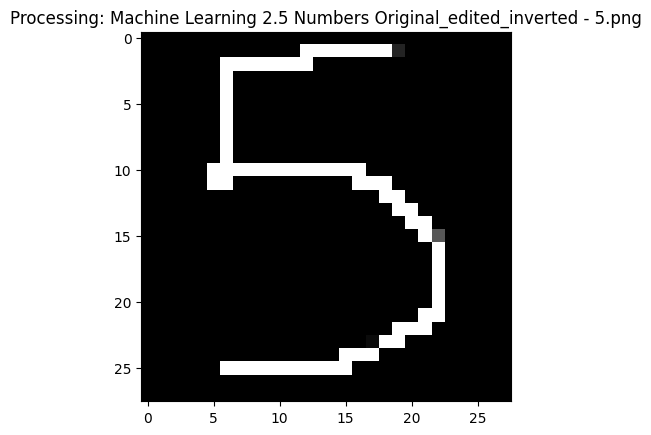

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Machine Learning 2.5 Numbers Original_edited_inverted - 5.png: Predicted as 3


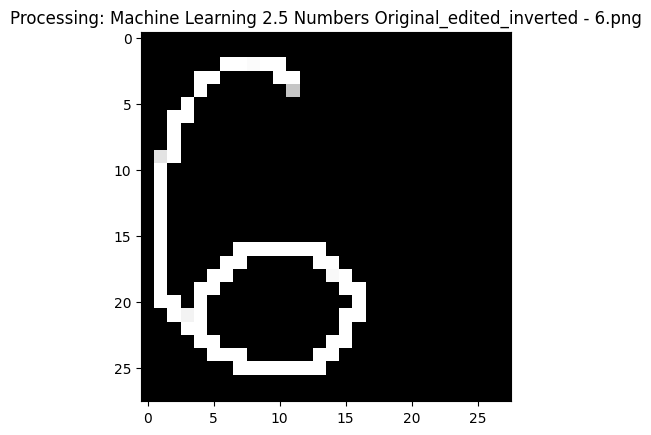

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Machine Learning 2.5 Numbers Original_edited_inverted - 6.png: Predicted as 3


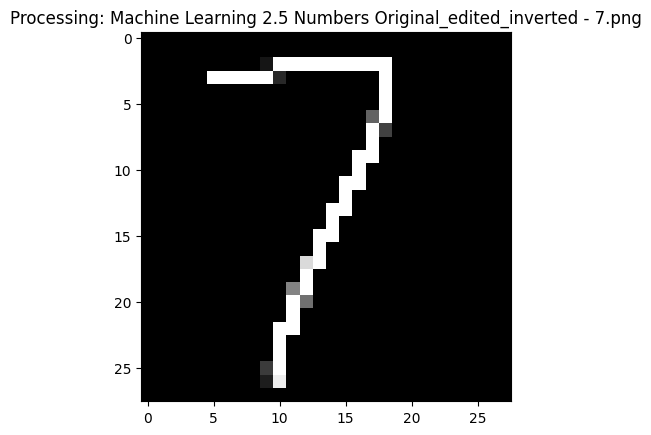

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Machine Learning 2.5 Numbers Original_edited_inverted - 7.png: Predicted as 1


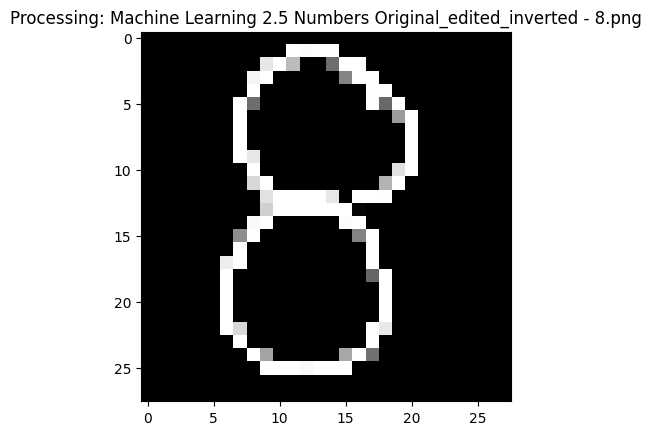

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Machine Learning 2.5 Numbers Original_edited_inverted - 8.png: Predicted as 8


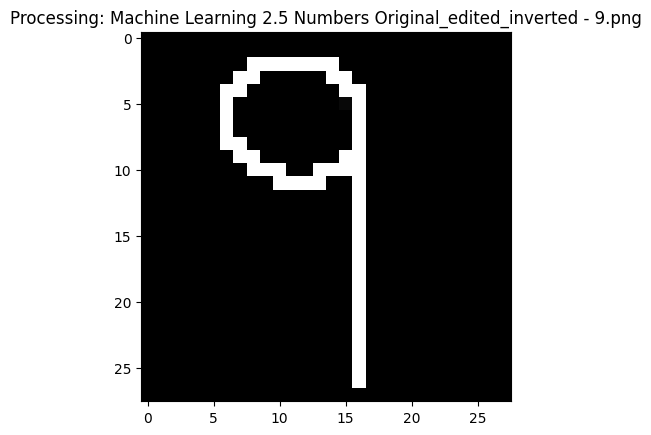

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Machine Learning 2.5 Numbers Original_edited_inverted - 9.png: Predicted as 7

Results Summary:
Machine Learning 2.5 Numbers Original_edited_inverted - 0.png -> 0
Machine Learning 2.5 Numbers Original_edited_inverted - 1.png -> 1
Machine Learning 2.5 Numbers Original_edited_inverted - 2.png -> 2
Machine Learning 2.5 Numbers Original_edited_inverted - 3.png -> 3
Machine Learning 2.5 Numbers Original_edited_inverted - 4.png -> 4
Machine Learning 2.5 Numbers Original_edited_inverted - 5.png -> 3
Machine Learning 2.5 Numbers Original_edited_inverted - 6.png -> 3
Machine Learning 2.5 Numbers Original_edited_inverted - 7.png -> 1
Machine Learning 2.5 Numbers Original_edited_inverted - 8.png -> 8
Machine Learning 2.5 Numbers Original_edited_inverted - 9.png -> 7


In [65]:
import matplotlib.pyplot as plt

# Directory where your images are stored
image_dir = r'C:\Users\rubix\Downloads\Machine Learning 2\06 Downloads\2.5 Numbers'
# Get all image files (adjust extensions as needed)
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
# Store results
results = []

# Process each image
for image_file in image_files:
    img = Image.open(os.path.join(image_dir, image_file)).convert('L')
    
    # Resize to 28x28
    newsize = (28, 28)
    img2 = img.resize(newsize)
    
    # Visualize what we're feeding the model
    plt.imshow(img2, cmap='gray')
    plt.title(f"Processing: {image_file}")
    plt.show()
    
    # Convert to array
    testimg = asarray(img2)
    # Normalize
    testimg = testimg.astype('float32') / 255.0
    # Reshape
    testimg = testimg.reshape(1, 28, 28, 1)
    
    # Make prediction (assuming your model is called 'model')
    prediction = model.predict(testimg)
    predicted_digit = prediction.argmax()
    
    # Store result
    results.append({
        'filename': image_file,
        'predicted': predicted_digit
    })
    
    print(f"{image_file}: Predicted as {predicted_digit}")

# Print summary
print("\nResults Summary:")
for result in results:
    print(f"{result['filename']} -> {result['predicted']}")